In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [132]:
class DataClean:
    def __init__(self):
        
        pass

    def Arrivals_column_cleaning(self, df, col): # dtype was object, so to change to float
        
        df[col]=df[col].str.replace(',','')
        df[col]=df[col].astype(float)
        return df[col]

    def Null_Value_Handling(self,df, col): #replacing na with mode
        
        n=df[col].mode()
        print(n)
        df[col]=df[col].fillna(n)
        return df[col]

    def unique_items(self,df,col):
        
        return df[col].unique()

    def drop_col(self, df, col):
        
        df.drop(columns=col,inplace=True)        

    def check_na_sum(self,df):
        
        return df.isna().sum()

    def pie_chart(self,df,col):
        
        plt.pie(df[col].value_counts(),labels=df[col].value_counts().index)
    

    def histogram(self,col): #plotting histogram
        
        plt.hist(col)


    def tonne_to_quintal(self, quant): #tonne to quintal conversion
        
        return quant*10

    def apply_func(self, df, col, func):
        
        df[col]=df[col].apply(func)
        

    def col_rename(self, old, new):
        df.rename(columns={
            old:new
        }, inplace= True)


    def date_conversion(self, df, col):
        
        df[col]=pd.to_datetime(df[col])
        df['Year']=df[col].dt.year
        df['Month']=df[col].dt.month

    def month_to_string(self, month):
        months=[m for m in calendar.month_name if m]
        return months[month-1]

In [133]:
dc=DataClean()

In [134]:
df=pd.read_excel("Agmarknet_Price_And_Arrival_Report (1).xlsx",header=1)

In [135]:
df.head()

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
0,Punjab,Fazilka,Abohar,Other,Cereals,100.00,2130.0,2130,2130,2023-05-26
1,Punjab,Fazilka,Abohar,Other,Cereals,136.00,2125.0,2125,2125,2023-05-25
2,Punjab,Fazilka,Abohar,Other,Cereals,256.00,2125.0,2130,2125,2023-05-24
3,Punjab,Fazilka,Abohar,Other,Cereals,270.00,2125.0,2130,2125,2023-05-23
4,Punjab,Fazilka,Abohar,Other,Cereals,474.00,2125.0,2130,2125,2023-05-22


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667 entries, 0 to 5666
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   State Name                 5667 non-null   object        
 1   District Name              5667 non-null   object        
 2   Market Name                5667 non-null   object        
 3   Variety                    5667 non-null   object        
 4   Group                      5667 non-null   object        
 5   Arrivals (Tonnes)          5659 non-null   object        
 6   Min Price (Rs./Quintal)    5667 non-null   float64       
 7   Max Price (Rs./Quintal)    5667 non-null   int64         
 8   Modal Price (Rs./Quintal)  5667 non-null   int64         
 9   Reported Date              5667 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 442.9+ KB


In [137]:
dc.check_na_sum(df)

State Name                   0
District Name                0
Market Name                  0
Variety                      0
Group                        0
Arrivals (Tonnes)            8
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    0
Reported Date                0
dtype: int64

In [138]:
df['Arrivals (Tonnes)']=dc.Arrivals_column_cleaning(df, 'Arrivals (Tonnes)')

In [139]:
dc.check_na_sum(df)

State Name                   0
District Name                0
Market Name                  0
Variety                      0
Group                        0
Arrivals (Tonnes)            8
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    0
Reported Date                0
dtype: int64

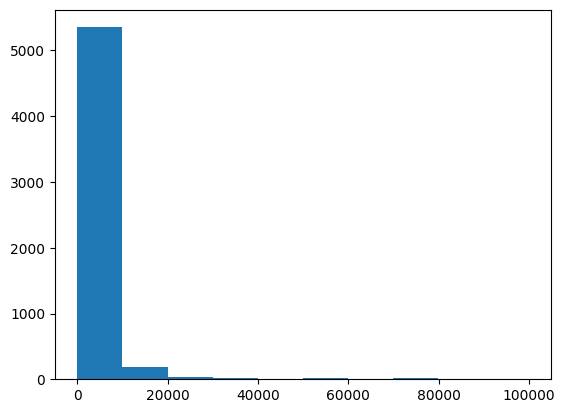

In [140]:
dc.histogram(df['Arrivals (Tonnes)'])

In [141]:
df['Arrivals (Tonnes)'] = dc.Null_Value_Handling(df, 'Arrivals (Tonnes)')

0    100.0
Name: Arrivals (Tonnes), dtype: float64


In [142]:
dc.unique_items(df,'Variety')

array(['Other', '147 Average', '147 Best', 343, 'Local', 'Medium',
       'PBW-343', 1482, 'Hybrid', 'Super Fine'], dtype=object)

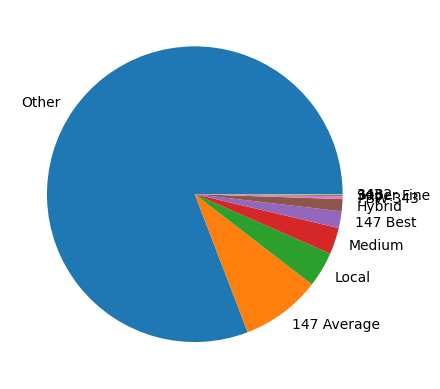

In [143]:
dc.pie_chart(df,'Variety')

In [144]:
dc.unique_items(df,'State Name')
dc.drop_col(df,'State Name')
df.head()

,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
0,Fazilka,Abohar,Other,Cereals,100.0,2130.0,2130,2130,2023-05-26
1,Fazilka,Abohar,Other,Cereals,136.0,2125.0,2125,2125,2023-05-25
2,Fazilka,Abohar,Other,Cereals,256.0,2125.0,2130,2125,2023-05-24
3,Fazilka,Abohar,Other,Cereals,270.0,2125.0,2130,2125,2023-05-23
4,Fazilka,Abohar,Other,Cereals,474.0,2125.0,2130,2125,2023-05-22


In [145]:
dc.unique_items(df,'Market Name')

array(['Abohar', 'Adampur', 'Ajitwal', 'Ajitwal (Chogawan)',
       'Ajitwal (Dala)', 'Amargarh', 'Amloh', 'Amloh(Gobind Garh Mandi)',
       'Attari', 'Badhni Kalan', 'Badhni Kallan (Bilaspur)',
       'Baghapurana', 'Banga (Kataria)', 'Banur', 'Banur (Kheragaju)',
       'Bareta', 'Bariwala', 'Barnala', 'Bassi Pathana', 'Bhadaur',
       'Bhadaur(Sehna)', 'Bhadson', 'Bhawanigarh', 'Bhikhi', 'Bhucho',
       'Bhulath', 'Bhulath (Ibrahimaaaaval)', 'Bhulath (Nadala)', 'Bilga',
       'Bilga (Talwan )', 'Boha', 'Budalada', 'Budhlada (Phaphre Bhaike)',
       'Chabhal', 'Chanarthal', 'Dakala', 'Dasuya', 'Dera Bassi',
       'Dhanaula', 'Dharamkot', 'Dhariwal', 'Dhilwan', 'Dinanagar',
       'Dirba', 'Dudhansadhan', 'Faridkot', 'Faridkot (Machakikalan)',
       'Firozepur City', 'Garh Shankar', 'Garh Shankar(Mahalpur)',
       'GarhShankar (Kotfatuhi)', 'Garhshankar(Saila Khurd)',
       'Gehri(Jandiala mandi)', 'Giddarbaha', 'Guru Har Sahai', 'Hathur',
       'Jagraon', 'Jaitu', 'Jaitu(Ba

In [146]:
dc.apply_func(df, 'Arrivals (Tonnes)', dc.tonne_to_quintal) #convert the Arrivals in Tonnes to Quintal
dc.col_rename('Arrivals (Tonnes)', 'Arrivals (Quintal)')
df.head()

,District Name,Market Name,Variety,Group,Arrivals (Quintal),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
0,Fazilka,Abohar,Other,Cereals,1000.0,2130.0,2130,2130,2023-05-26
1,Fazilka,Abohar,Other,Cereals,1360.0,2125.0,2125,2125,2023-05-25
2,Fazilka,Abohar,Other,Cereals,2560.0,2125.0,2130,2125,2023-05-24
3,Fazilka,Abohar,Other,Cereals,2700.0,2125.0,2130,2125,2023-05-23
4,Fazilka,Abohar,Other,Cereals,4740.0,2125.0,2130,2125,2023-05-22


In [129]:
dc.date_conversion(df, 'Reported Date')
df.tail()

,District Name,Market Name,Variety,Group,Arrivals (Quintal),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Year,Month
5662,Ferozpur,Zira,Other,Cereals,895000.0,1975.0,1975,1975,2021-04-15,2021,4
5663,Ferozpur,Zira,Other,Cereals,854000.0,1975.0,1975,1975,2021-04-14,2021,4
5664,Ferozpur,Zira,Other,Cereals,617000.0,1975.0,1975,1975,2021-04-13,2021,4
5665,Ferozpur,Zira,Other,Cereals,34000.0,1975.0,1975,1975,2021-04-12,2021,4
5666,Ferozpur,Zira,Other,Cereals,6000.0,1975.0,1975,1975,2021-04-11,2021,4


In [130]:
dc.apply_func(df, 'Month', dc.month_to_string)
df.head()

,District Name,Market Name,Variety,Group,Arrivals (Quintal),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Year,Month
0,Fazilka,Abohar,Other,Cereals,1000.0,2130.0,2130,2130,2023-05-26,2023,May
1,Fazilka,Abohar,Other,Cereals,1360.0,2125.0,2125,2125,2023-05-25,2023,May
2,Fazilka,Abohar,Other,Cereals,2560.0,2125.0,2130,2125,2023-05-24,2023,May
3,Fazilka,Abohar,Other,Cereals,2700.0,2125.0,2130,2125,2023-05-23,2023,May
4,Fazilka,Abohar,Other,Cereals,4740.0,2125.0,2130,2125,2023-05-22,2023,May
